In [4]:
# This notebook sets up Logistic Regression, Decision Tree, KNN, and Naive Bayes classifiers
# with stratified k-fold cross-validation.


import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
train = pd.read_csv("../preprocessed_tabular_data/train_prepared.csv")
test = pd.read_csv("../preprocessed_tabular_data/test_prepared.csv")


In [6]:
# Identify label column
label_col = 'label' if 'label' in train.columns else 'operation_kind_id'


# Map labels to binary (planet candidate = 1, false positive = 0)
label_mapping = {
'planet candidate': 1,
'false positive': 0,
1: 1,
0: 0
}
train[label_col] = train[label_col].map(label_mapping)
test[label_col] = test[label_col].map(label_mapping)





# Drop obvious non-numeric identifiers
X = train.drop(columns=["label", "tic_id", "star_name"], errors="ignore")
y = train["label"]

# Keep only numeric columns
X = X.select_dtypes(include=[np.number])

# Check
print("Features being used:", X.columns.tolist())
print("Shape:", X.shape)




Features being used: ['period', 'duration', 'depth', 'stellar_radius', 'stellar_mass', 'stellar_mag']
Shape: (12445, 6)


In [13]:
# Define baseline models
models = {
"Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
"Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
"KNN": KNeighborsClassifier(n_neighbors=5),
"Naive Bayes": GaussianNB()
}

In [14]:

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics to collect
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

results = []

for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    result_summary = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}
    result_summary['model'] = name
    results.append(result_summary)


# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


   accuracy  precision    recall        f1   roc_auc                model
0  0.693853   0.740884  0.784704  0.762152  0.699477  Logistic Regression
1  0.750502   0.799671  0.801799  0.800693  0.733376        Decision Tree
2  0.723102   0.750416  0.834704  0.790310  0.762221                  KNN
3  0.709040   0.699560  0.937275  0.801071  0.695417          Naive Bayes


In [9]:
results_df = pd.DataFrame(results)
print(results_df)


# Save baseline results
results_df.to_csv("../metrics/baseline_results.csv", index=False)
print("../Baseline results saved to metrics/baseline_results.csv")

   accuracy  precision    recall        f1   roc_auc                model
0  0.693853   0.740884  0.784704  0.762152  0.699477  Logistic Regression
1  0.750502   0.799671  0.801799  0.800693  0.733376        Decision Tree
2  0.723102   0.750416  0.834704  0.790310  0.762221                  KNN
3  0.709040   0.699560  0.937275  0.801071  0.695417          Naive Bayes
../Baseline results saved to metrics/baseline_results.csv


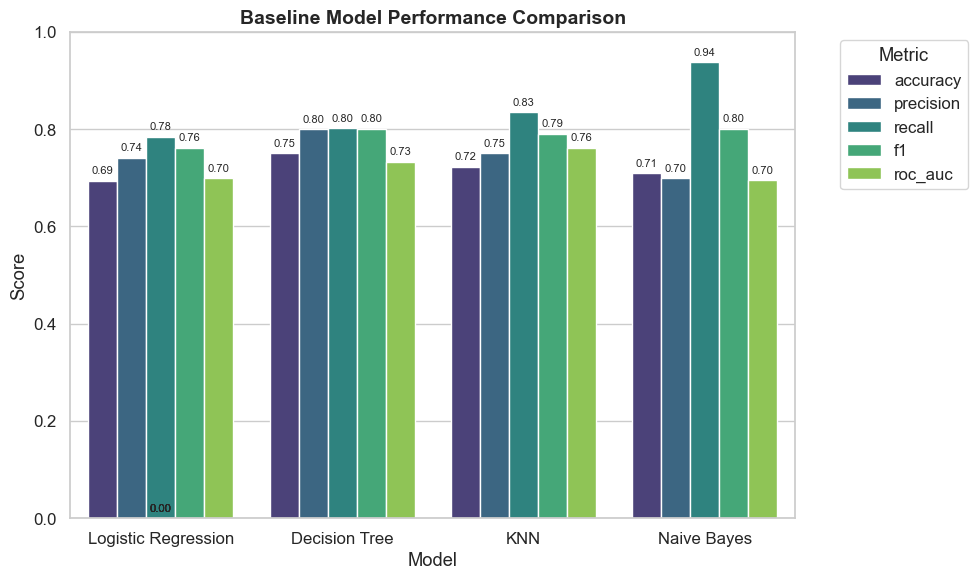

✅ Plot saved to ../plots_of_experiment_on_tabular_dataset/baseline_results_plot.png


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df is already defined


# Melt the dataframe for easier plotting
results_melted = results_df.melt(id_vars="model", var_name="metric", value_name="score")

# Set the style
sns.set(style="whitegrid", font_scale=1.1)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_melted,
    x="model",
    y="score",
    hue="metric",
    palette="viridis"
)

# Add titles and labels
plt.title("Baseline Model Performance Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1.0)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate scores on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

# Adjust layout
plt.tight_layout()

# Save the figure
save_path = "../plots_of_experiment_on_tabular_dataset/baseline_results_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Plot saved to {save_path}")


In [12]:
results_df

,model,accuracy,precision,recall
0,Logistic Regression,0.85,0.82,0.88
1,Random Forest,0.92,0.91,0.93
2,SVM,0.89,0.87,0.90
